In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
ts0 = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/temperatureTS.csv')

ts0 = ts0[ts0['Unnamed: 0'] < '2015-02-18 00:00:00']
ts0= ts0[ts0['Unnamed: 0'] > '2015-02-02 23:59:59']

ts = pd.Series(ts0['0'].values, ts0['Unnamed: 0'].values)

In [6]:
ts = ts.values
ts

array([20.6 , 20.6 , 20.6 , ..., 20.89, 20.89, 20.89])

In [7]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [8]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

In [9]:
# SAX transform
n_paa_segments = 720
#scelgo un numero che divide 8640 e divisibile per 6 (6 giorni)
n_sax_symbols = 15 #
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

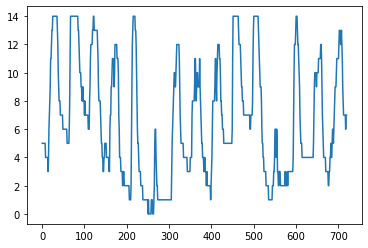

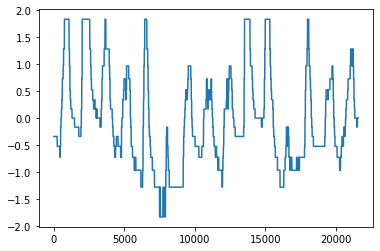

In [10]:
plt.plot(ts_sax.ravel())
plt.show()
plt.plot(sax_ts_inv.ravel())
plt.show()

In [11]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-1.8339146358159146: 0,
 -1.2815515655446004: 1,
 -0.967421566101701: 2,
 -0.7279132908816442: 3,
 -0.5244005127080409: 4,
 -0.3406948270877956: 5,
 -0.16789400478810546: 6,
 0.0: 7,
 0.16789400478810546: 8,
 0.3406948270877954: 9,
 0.5244005127080407: 10,
 0.7279132908816444: 11,
 0.967421566101701: 12,
 1.2815515655446004: 13,
 1.8339146358159146: 14}

In [12]:
seq = np.array([map_symbols[v] for v in sax_ts_inv.ravel()])

# Sequential Pattern Mining

In [13]:
from prefixspan import PrefixSpan

https://github.com/chuanconggao/PrefixSpan-py
    
https://pypi.org/project/prefixspan/

In [14]:
X_seq = list(ts_sax.ravel())

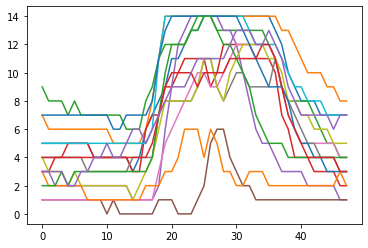

In [15]:
l = n_paa_segments // 15
tr = []

for i in range(15):
 
    #plt.subplot(i+331)
    plt.plot(X_seq[i*l:i*l + l])
    #plt.show()
    tr.append(X_seq[i*l:i*l+l])
    #print(X_seq[i*l:i*l+l])
    #print("\n\n")
    
plt.show()
#ho diviso in sei giorni, ogni giorno è una transizione 


In [16]:
ps = PrefixSpan(tr)

In [17]:
ps.topk(3, closed=True)

[(15, [5]), (15, [6]), (13, [5, 5])]

In [18]:
for i in range(3,14):
    print(len(ps.frequent(i, closed = True)))

2252
1418
816
451
235
118
64
33
18
11
5


In [19]:
ps.frequent(6, closed = True)

[(15, [5]),
 (13, [5, 5]),
 (8, [5, 5, 5]),
 (9, [5, 5, 4]),
 (8, [5, 5, 4, 4]),
 (6, [5, 5, 4, 3]),
 (11, [5, 4]),
 (9, [5, 4, 4]),
 (7, [5, 4, 3]),
 (8, [5, 3]),
 (6, [5, 3, 3]),
 (8, [5, 6]),
 (6, [5, 6, 9, 9]),
 (6, [5, 6, 11, 11]),
 (6, [5, 6, 11, 11, 9]),
 (6, [5, 6, 11, 12]),
 (6, [5, 6, 10]),
 (6, [5, 6, 10, 9]),
 (6, [5, 7, 7]),
 (7, [5, 9, 9]),
 (6, [5, 9, 9, 7]),
 (7, [5, 11, 11]),
 (7, [5, 11, 11, 9]),
 (6, [5, 11, 11, 9, 7]),
 (6, [5, 11, 11, 7]),
 (7, [5, 11, 12]),
 (6, [5, 11, 12, 12, 7]),
 (6, [5, 11, 12, 9]),
 (6, [5, 11, 12, 11]),
 (7, [5, 10]),
 (7, [5, 10, 9]),
 (6, [5, 10, 9, 7]),
 (6, [5, 10, 7]),
 (13, [4]),
 (11, [4, 4]),
 (6, [4, 4, 4, 4]),
 (6, [4, 4, 3]),
 (7, [4, 4, 6]),
 (6, [4, 4, 7, 7]),
 (6, [4, 4, 9, 11, 11, 9, 7]),
 (6, [4, 4, 9, 11, 11, 7]),
 (6, [4, 4, 9, 11, 7]),
 (6, [4, 4, 9, 10, 7]),
 (6, [4, 4, 5]),
 (9, [4, 3]),
 (7, [4, 3, 3]),
 (6, [4, 3, 3, 3, 3]),
 (8, [4, 6]),
 (6, [4, 6, 5]),
 (6, [4, 7, 11, 9, 7]),
 (6, [4, 7, 11, 7]),
 (6, [4, 7, 10, 9,

In [20]:
for i in range(3,14):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) > 1:
            l = l+1
    print(l)

2241
1407
805
441
225
108
54
23
9
2
1


In [21]:
for i in range(3,14):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) > 2:
            l = l+1
    print(l)

2174
1340
739
378
167
60
20
3
1
0
0


In [22]:
for i in range(3,14):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) > 3:
            l = l+1
    print(l)

2001
1170
582
250
77
16
3
0
0
0
0


In [23]:
for j in ps.frequent(11, closed = True):
        if len(j[1]) > 2:
            print(j)

(11, [11, 11, 9])


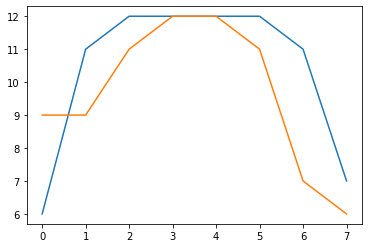

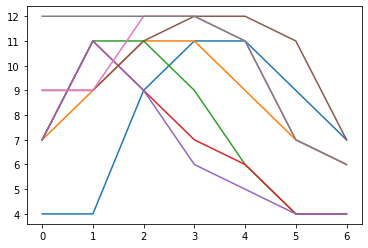

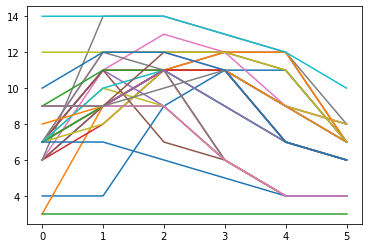

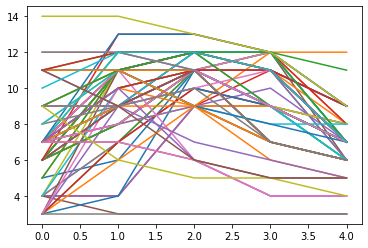

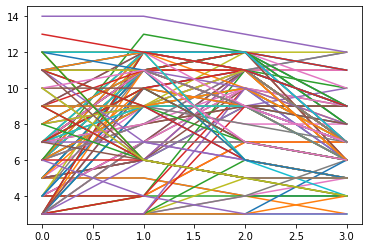

In [24]:
for j in range (15, 3, -1):       
    for i in ps.frequent(6, closed = True):
        if len(i[1]) == j:
            plt.plot(i[1])
    plt.show()

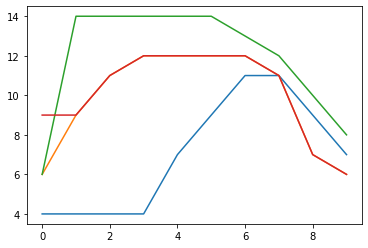

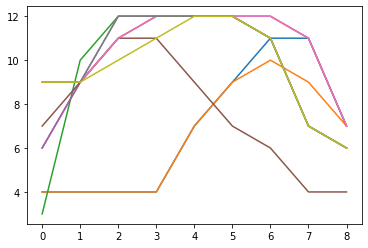

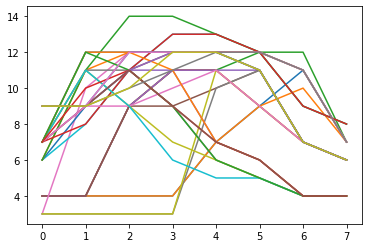

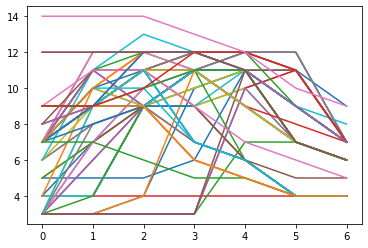

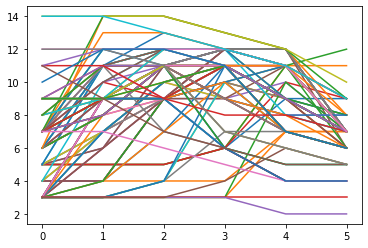

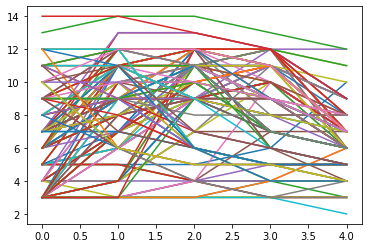

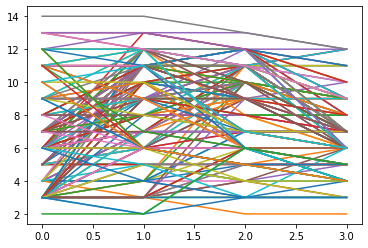

In [25]:
for j in range (20, 3, -1):       
    for i in ps.frequent(5, closed = True):
        if len(i[1]) == j:
            plt.plot(i[1])
    plt.show()

In [26]:
ps.topk(5, closed = True)

[(15, [5]), (15, [6]), (13, [4]), (13, [5, 5]), (13, [9])]

### transiction of mroe element

In [27]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

In [28]:
# SAX transform
n_paa_segments = 720
#scelgo un numero che divide 8640 e divisibile per 6 (6 giorni)
n_sax_symbols = 7

sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

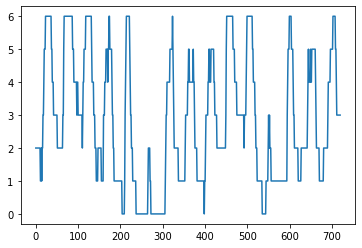

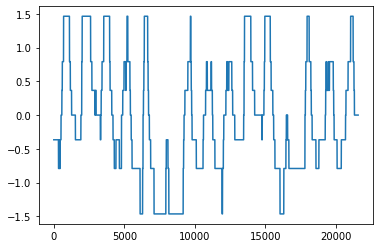

In [29]:
plt.plot(ts_sax.ravel())
plt.show()
plt.plot(sax_ts_inv.ravel())
plt.show()

In [30]:
X_seq = ts_sax.ravel()

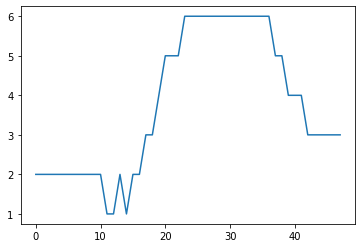

[2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 3 3 4 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 5 5 4 4 4 3 3 3 3 3 3]





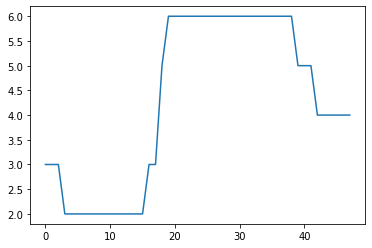

[3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 5 5 5 4 4 4 4 4 4]





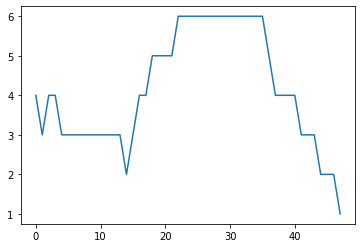

[4 3 4 4 3 3 3 3 3 3 3 3 3 3 2 3 4 4 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5
 4 4 4 4 3 3 3 2 2 2 1]





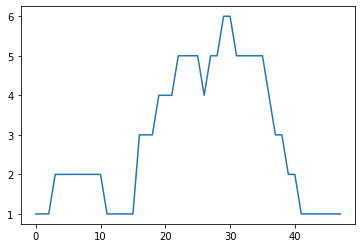

[1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 4 4 4 5 5 5 5 4 5 5 6 6 5 5 5 5 5 4
 3 3 2 2 1 1 1 1 1 1 1]





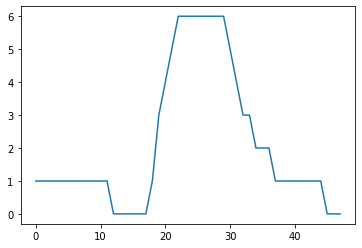

[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 3 4 5 6 6 6 6 6 6 6 6 5 4 3 3 2 2 2
 1 1 1 1 1 1 1 1 0 0 0]





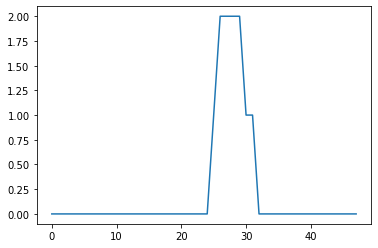

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]





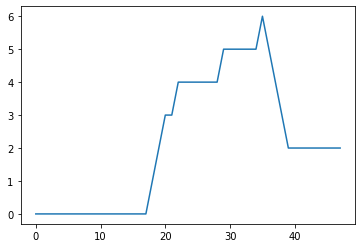

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 3 4 4 4 4 4 4 4 5 5 5 5 5 5 6 5
 4 3 2 2 2 2 2 2 2 2 2]





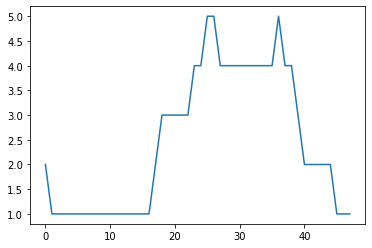

[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 3 3 3 4 4 5 5 4 4 4 4 4 4 4 4 4 5
 4 4 3 2 2 2 2 2 1 1 1]





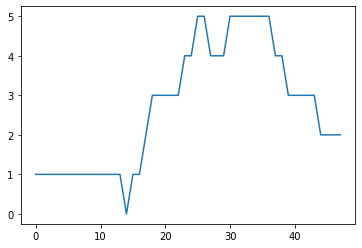

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 3 3 3 3 3 4 4 5 5 4 4 4 5 5 5 5 5 5 5
 4 4 3 3 3 3 3 2 2 2 2]





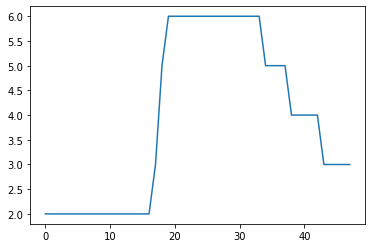

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5
 5 4 4 4 4 4 3 3 3 3 3]





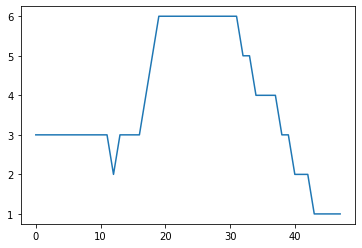

[3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 4 5 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 4 4 4
 4 3 3 2 2 2 1 1 1 1 1]





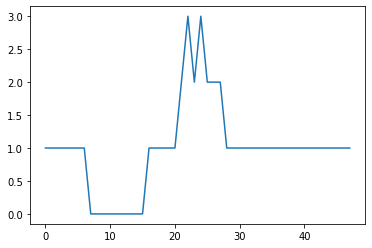

[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 3 2 3 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]





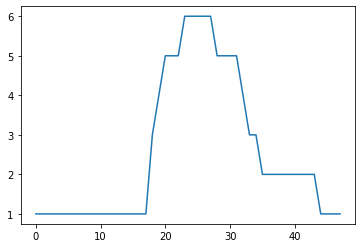

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4 5 5 5 6 6 6 6 6 5 5 5 5 4 3 3 2 2
 2 2 2 2 2 2 2 1 1 1 1]





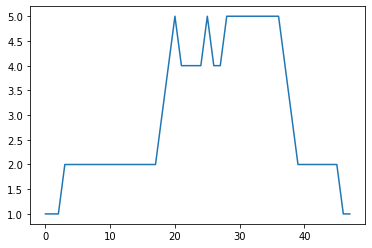

[1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 5 4 4 4 4 5 4 4 5 5 5 5 5 5 5 5 5
 4 3 2 2 2 2 2 2 2 1 1]





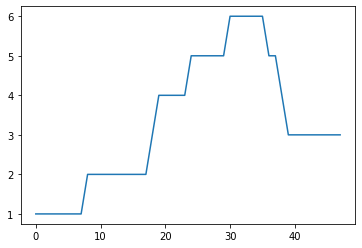

[1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 5
 5 4 3 3 3 3 3 3 3 3 3]





In [31]:
l = n_paa_segments // 15
tr = []
for i in range(15):
    plt.plot(X_seq[i*l:i*l + l])
    plt.show()
    tr.append(X_seq[i*l:i*l+l])
    print(X_seq[i*l:i*l+l])
    print("\n\n")
    
#ho diviso in sei giorni, ogni giorno è una transizione 


In [32]:
for i in tr: print(i)

[2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 3 3 4 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 5 5 4 4 4 3 3 3 3 3 3]
[3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 5 5 5 4 4 4 4 4 4]
[4 3 4 4 3 3 3 3 3 3 3 3 3 3 2 3 4 4 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5
 4 4 4 4 3 3 3 2 2 2 1]
[1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 4 4 4 5 5 5 5 4 5 5 6 6 5 5 5 5 5 4
 3 3 2 2 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 3 4 5 6 6 6 6 6 6 6 6 5 4 3 3 2 2 2
 1 1 1 1 1 1 1 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 3 4 4 4 4 4 4 4 5 5 5 5 5 5 6 5
 4 3 2 2 2 2 2 2 2 2 2]
[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 3 3 3 4 4 5 5 4 4 4 4 4 4 4 4 4 5
 4 4 3 2 2 2 2 2 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 3 3 3 3 3 4 4 5 5 4 4 4 5 5 5 5 5 5 5
 4 4 3 3 3 3 3 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5
 5 4 4 4 4 4 3 3 3 3 3]
[3 3 3 3 3

In [33]:
db = []
l = len(tr[0]) // 15
for t in tr:
    li = []
    for i in range(15):
        li.append(tuple(set(t[i*l:i*l+l])))
    db.append(li)

In [34]:
for i in db : print(i)

[(2,), (2,), (2,), (1, 2), (1, 2), (2, 3), (3, 4, 5), (5, 6), (6,), (6,), (6,), (6,), (5, 6), (4,), (3,)]
[(3,), (2,), (2,), (2,), (2,), (2, 3), (5, 6), (6,), (6,), (6,), (6,), (6,), (6,), (5,), (4,)]
[(3, 4), (3, 4), (3,), (3,), (2, 3), (3, 4), (5,), (5, 6), (6,), (6,), (6,), (6,), (4, 5), (3, 4), (2, 3)]
[(1,), (2,), (2,), (1, 2), (1,), (1, 3), (3, 4), (4, 5), (4, 5), (5, 6), (5, 6), (5,), (3, 4), (1, 2), (1,)]
[(1,), (1,), (1,), (1,), (0,), (0,), (1, 3, 4), (5, 6), (6,), (6,), (3, 4, 5), (2, 3), (1, 2), (1,), (1,)]
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0, 1, 2), (2,), (0, 1), (0,), (0,), (0,), (0,)]
[(0,), (0,), (0,), (0,), (0,), (0,), (1, 2, 3), (3, 4), (4,), (4, 5), (5,), (5, 6), (3, 4, 5), (2,), (2,)]
[(1, 2), (1,), (1,), (1,), (1,), (1, 2), (3,), (3, 4), (4, 5), (4,), (4,), (4,), (4, 5), (2, 3), (2,)]
[(1,), (1,), (1,), (1,), (0, 1), (1, 2), (3,), (3, 4), (4, 5), (4,), (5,), (5,), (4, 5), (3,), (2, 3)]
[(2,), (2,), (2,), (2,), (2,), (2, 3), (5, 6), (6,), (6,), (6,), 

In [35]:
p = PrefixSpan(db)

In [36]:
p.frequent(6, closed=True)

[(10, [(2,)]),
 (8, [(2,), (2,)]),
 (9, [(1, 2)]),
 (10, [(2, 3)]),
 (9, [(5, 6)]),
 (7, [(5, 6), (6,)]),
 (6, [(5, 6), (6,), (6,)]),
 (8, [(6,)]),
 (7, [(6,), (6,)]),
 (8, [(4,)]),
 (7, [(3,)]),
 (7, [(5,)]),
 (8, [(3, 4)]),
 (7, [(3, 4), (4, 5)]),
 (10, [(4, 5)]),
 (8, [(1,)]),
 (7, [(1,), (1,)]),
 (7, [(1,), (1,), (1, 2)]),
 (6, [(1,), (1,), (1,)]),
 (6, [(1,), (4, 5)])]